In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
ds = pd.read_csv("Tweets.csv")

In [68]:
ds.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [69]:
# Data Cleaning
# EDA
# Text preprocessing
# Model Building
# Model Evaluate

## Data Cleaning

In [70]:
col = ['tweet_id','airline_sentiment_gold','negativereason_gold','tweet_coord']
ds = ds.drop(col,axis=1)

In [71]:
def fill_null(ds):
  if pd.isnull(ds['negativereason']):
    if ds['airline_sentiment']=='positive':
      return 'positive feedback'
    elif ds['airline_sentiment']=='neutral':
      return 'neutral feedback'
    else:
      return 'other'
  else:
    return ds['negativereason']

In [72]:
ds['negativereason'] = ds.apply(fill_null,axis=1)

In [73]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,neutral feedback,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,positive,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,neutral feedback,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [74]:
ds['negativereason_confidence'] = ds['negativereason_confidence'].fillna(0)

In [75]:
ds['tweet_location']

0                  NaN
1                  NaN
2            Lets Play
3                  NaN
4                  NaN
             ...      
14635              NaN
14636            Texas
14637    Nigeria,lagos
14638       New Jersey
14639       dallas, TX
Name: tweet_location, Length: 14640, dtype: object

In [76]:
ds = ds.drop(columns='tweet_location',axis=1)

In [77]:
ds = ds.drop(columns='user_timezone',axis=1)

In [78]:
ds.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

## EDA

In [79]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


<Axes: xlabel='airline_sentiment', ylabel='count'>

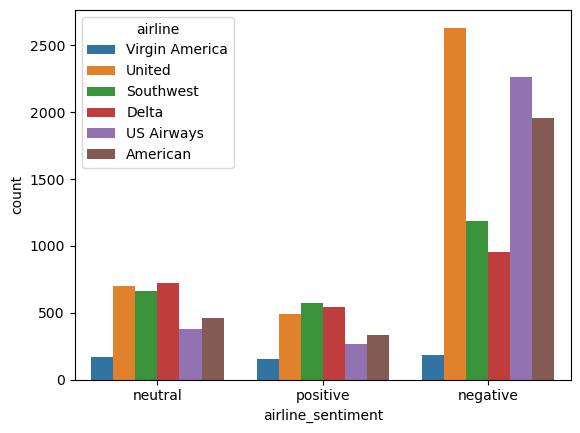

In [80]:
sns.countplot(x='airline_sentiment',hue='airline',data=ds)

In [81]:
ds['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

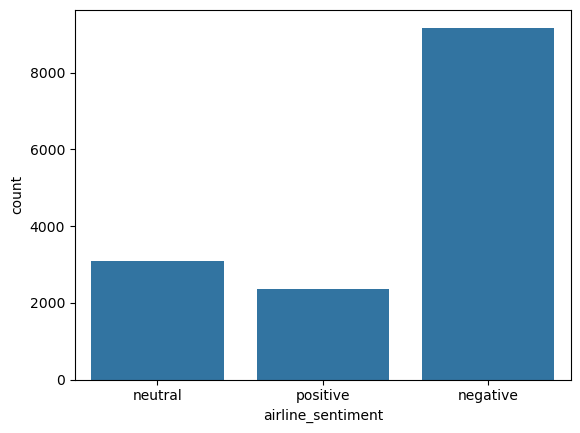

In [82]:
# airline sentiment distribution
sns.countplot(x='airline_sentiment',data=ds)

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
le = LabelEncoder()
ds['airline_sentiment'] = le.fit_transform(ds['airline_sentiment'])

In [85]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [86]:
from nltk import word_tokenize,sent_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anves\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [87]:
ds['number_character'] = ds['text'].apply(len)

In [88]:
ds['number_word'] = ds['text'].apply(lambda x:len(word_tokenize(x)))

In [89]:
ds['number_sentence'] = ds['text'].apply(lambda x:len(sent_tokenize(x)))

In [90]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,number_character,number_word,number_sentence
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1


In [91]:
ds[ds['airline_sentiment']==0].describe()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,number_character,number_word,number_sentence
count,9178.0,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000,9178.000000
mean,0.0,0.933365,0.731769,0.093375,113.947919,24.125953,2.094138
std,0.0,0.138109,0.238276,0.792865,30.719006,6.817604,0.979059
min,0.0,0.339400,0.312200,0.000000,12.000000,3.000000,1.000000
25%,0.0,1.000000,0.645300,0.000000,96.000000,20.000000,1.000000
50%,0.0,1.000000,0.680600,0.000000,126.000000,26.000000,2.000000
75%,0.0,1.000000,1.000000,0.000000,138.000000,29.000000,3.000000
max,0.0,1.000000,1.000000,44.000000,176.000000,46.000000,9.000000


In [92]:
ds[ds['airline_sentiment']==2].describe()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,number_character,number_word,number_sentence
count,2363.0,2363.000000,2363.0,2363.000000,2363.000000,2363.000000,2363.000000
mean,2.0,0.872039,0.0,0.069403,86.082945,18.293271,2.069826
std,0.0,0.179478,0.0,0.659914,39.482103,8.289220,0.969361
min,2.0,0.335600,0.0,0.000000,12.000000,3.000000,1.000000
25%,2.0,0.677500,0.0,0.000000,52.000000,11.500000,1.000000
50%,2.0,1.000000,0.0,0.000000,86.000000,18.000000,2.000000
75%,2.0,1.000000,0.0,0.000000,124.000000,25.000000,3.000000
max,2.0,1.000000,0.0,22.000000,186.000000,47.000000,9.000000


In [93]:
ds[ds['airline_sentiment']==1].describe()

,airline_sentiment,airline_sentiment_confidence,negativereason_confidence,retweet_count,number_character,number_word,number_sentence
count,3099.0,3099.000000,3099.0,3099.000000,3099.000000,3099.000000,3099.000000
mean,1.0,0.823303,0.0,0.060987,87.359471,18.427557,1.701194
std,0.0,0.185594,0.0,0.658037,37.682903,8.000655,0.846385
min,1.0,0.335000,0.0,0.000000,12.000000,3.000000,1.000000
25%,1.0,0.666050,0.0,0.000000,57.000000,12.000000,1.000000
50%,1.0,0.916000,0.0,0.000000,87.000000,18.000000,1.000000
75%,1.0,1.000000,0.0,0.000000,123.000000,25.000000,2.000000
max,1.0,1.000000,0.0,28.000000,167.000000,41.000000,6.000000


In [94]:
ds[ds['airline_sentiment']==0]['negativereason'].value_counts()

negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64

## Text preprocessing

In [95]:
# Lower case
# tokenize
# Stop words and punctuation removal
# special character
# Stemming

In [96]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anves\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [97]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anves\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
from tkinter.constants import Y
def text_transform(text):
  text = text.lower()
  text = word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(lemmatizer.lemmatize(i))

  return " ".join(y)

In [99]:
ds['transformed_text'] = ds['text'].apply(text_transform)

In [100]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,number_character,number_word,number_sentence,transformed_text
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,virginamerica dhepburn said
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,virginamerica plus added commercial experience...
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,virginamerica today must mean need take anothe...
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,virginamerica really aggressive blast obnoxiou...
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,virginamerica really big bad thing


In [101]:
from wordcloud import WordCloud

In [102]:
wc = WordCloud(width=600,height=500,min_font_size=10,background_color='white')

In [103]:
negative_wc = wc.generate(ds[ds['airline_sentiment']==0]['transformed_text'].str.cat(sep=" "))

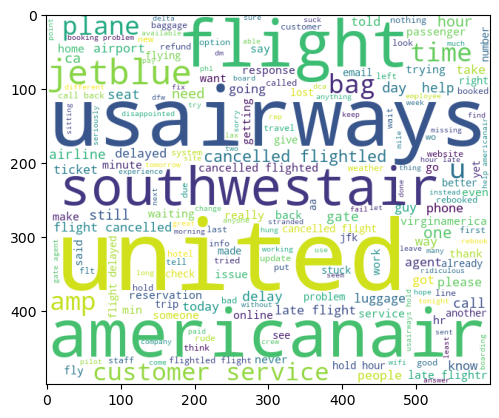

In [104]:
plt.imshow(negative_wc)

In [105]:
posistive_wc = wc.generate(ds[ds['airline_sentiment']==2]['transformed_text'].str.cat(sep=" "))

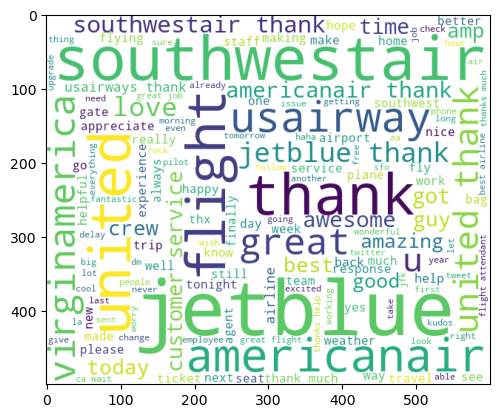

In [106]:
plt.imshow(posistive_wc)

In [107]:
neutral_wc = wc.generate(ds[ds['airline_sentiment']==1]['transformed_text'].str.cat(sep=" "))

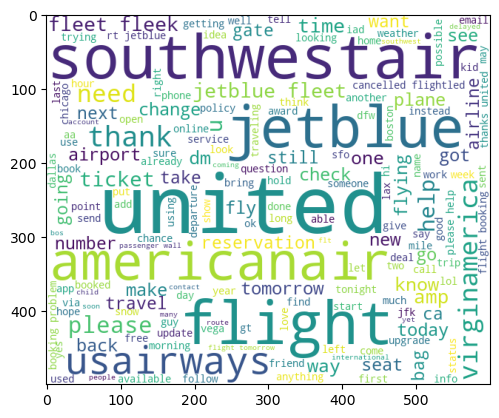

In [108]:
plt.imshow(neutral_wc)

## Model Building

In [109]:
ds.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,number_character,number_word,number_sentence,transformed_text
0,1,1.0000,neutral feedback,0.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,35,7,1,virginamerica dhepburn said
1,2,0.3486,positive feedback,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,72,13,1,virginamerica plus added commercial experience...
2,1,0.6837,neutral feedback,0.0000,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,71,16,1,virginamerica today must mean need take anothe...
3,0,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,126,24,1,virginamerica really aggressive blast obnoxiou...
4,0,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,55,12,1,virginamerica really big bad thing


In [110]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [111]:
tf = TfidfVectorizer(max_features=3000)
X = tf.fit_transform(ds['transformed_text']).toarray()

In [112]:
# Splitting data
y = ds['airline_sentiment']

In [113]:
X.shape

(14640, 3000)

In [114]:
X_test.shape

(2928,)

In [115]:
X_train.shape

(11712,)

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

**We will use "classification_report" for checking correct accuracy because here the output are not binary it is multiclass classifier**

> Add blockquote



In [119]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [121]:
gnb.fit(X_train,y_train)
pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

0.43579234972677594
[[754 410 627]
 [ 85 164 399]
 [ 48  83 358]]
              precision    recall  f1-score   support

           0       0.85      0.42      0.56      1791
           1       0.25      0.25      0.25       648
           2       0.26      0.73      0.38       489

    accuracy                           0.44      2928
   macro avg       0.45      0.47      0.40      2928
weighted avg       0.62      0.44      0.46      2928



In [122]:
mnb.fit(X_train,y_train)
pred2 = gnb.predict(X_test)
print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

0.43579234972677594
[[754 410 627]
 [ 85 164 399]
 [ 48  83 358]]
              precision    recall  f1-score   support

           0       0.85      0.42      0.56      1791
           1       0.25      0.25      0.25       648
           2       0.26      0.73      0.38       489

    accuracy                           0.44      2928
   macro avg       0.45      0.47      0.40      2928
weighted avg       0.62      0.44      0.46      2928



In [123]:
bnb.fit(X_train,y_train)
pred3 = gnb.predict(X_test)
print(accuracy_score(y_test,pred3))
print(confusion_matrix(y_test,pred3))
print(classification_report(y_test,pred3))

0.43579234972677594
[[754 410 627]
 [ 85 164 399]
 [ 48  83 358]]
              precision    recall  f1-score   support

           0       0.85      0.42      0.56      1791
           1       0.25      0.25      0.25       648
           2       0.26      0.73      0.38       489

    accuracy                           0.44      2928
   macro avg       0.45      0.47      0.40      2928
weighted avg       0.62      0.44      0.46      2928



In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lr = LogisticRegression(class_weight='balanced',multi_class='multinomial')

In [126]:
lr.fit(X_train,y_train)
pred4 = gnb.predict(X_test)
print(accuracy_score(y_test,pred4))
print(confusion_matrix(y_test,pred4))
print(classification_report(y_test,pred4))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.43579234972677594
[[754 410 627]
 [ 85 164 399]
 [ 48  83 358]]
              precision    recall  f1-score   support

           0       0.85      0.42      0.56      1791
           1       0.25      0.25      0.25       648
           2       0.26      0.73      0.38       489

    accuracy                           0.44      2928
   macro avg       0.45      0.47      0.40      2928
weighted avg       0.62      0.44      0.46      2928



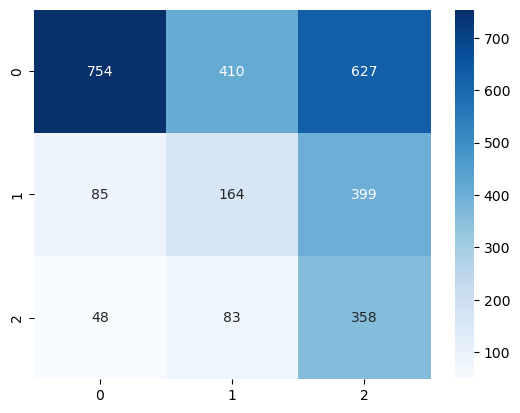

In [127]:
sns.heatmap(confusion_matrix(y_test, pred4), annot=True, fmt='d', cmap='Blues')
plt.show()

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [136]:
pred5 = rfc.predict(X_test)
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

0.7441939890710383
[[1680   78   33]
 [ 332  263   53]
 [ 182   71  236]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.84      1791
           1       0.64      0.41      0.50       648
           2       0.73      0.48      0.58       489

    accuracy                           0.74      2928
   macro avg       0.71      0.61      0.64      2928
weighted avg       0.73      0.74      0.72      2928



In [140]:
comment = ["Love the free snacks and comfy seats on @United. Keep it up!"]
cmnt_vectorizer = tf.transform(comment)

pred_num = rfc.predict(cmnt_vectorizer)[0]
pred_label = le.inverse_transform([pred_num])[0]

print("Predicted Sentiment:", pred_label)

Predicted Sentiment: positive
